# Problema 1: Prueba rápida de detección de COVID-19

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## 1.- Análisis de datos

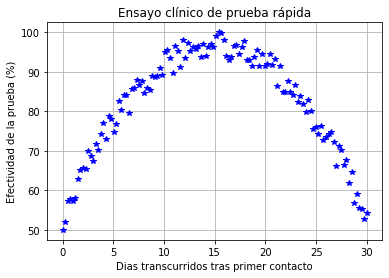

In [2]:
#Cargar datos
data = np.load('datos/datos_p1.npy')

#Extraer informacion
x = data[:, 0]
y = data[:, 1]

#Graficar valores
plt.title("Ensayo clínico de prueba rápida")
plt.xlabel("Dias transcurridos tras primer contacto")
plt.ylabel("Efectividad de la prueba (%)")
plt.plot(x, y, '*', color='blue');
plt.grid()
plt.show()